In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Voy a desmenuzar el f_disk y voy a ver cual de los parámetros influye más en el valor de este

#### GADGET

In [18]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import time_conversion as tiempo

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
vector2 = ('M31','MW','M33')
vector = ('00','01','03')

#path = 'home/ornela/SimCLUES/'
path = '/home/omarioni/'

atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
# aexp = aexp[::-1]

path = '/mnt/is2/alejandro/ornella/'

snapshot=range(496,50,-1)
for isnap in snapshot:
    snap = h5py.File(path + 'outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
#     print aexp[isnap]

#     lala

    for i in range(1,2):
        cm   = snap['subhalo_0'+ str('%s'%vector[i])+ '/Center'].value
        r200 = snap['subhalo_0'+ str('%s'%vector[i])+ '/R200'].value

        pstr = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Coordinates'].value
        mstr = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Masses'].value
        vel  = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Velocities'].value
        
        pgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Coordinates'].value
        mgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Masses'].value
        
        pdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Coordinates'].value
        mdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Masses'].value

        z = a0/aexp[isnap] - 1.
        Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
        time = tiempo.conv(z, h, omega_lambda, omega_matter)

    #---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
        ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
        zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
        
        xgas = (pgas[:,0]-cm[0])*aexp[isnap]/h
        ygas = (pgas[:,1]-cm[1])*aexp[isnap]/h
        zgas = (pgas[:,2]-cm[2])*aexp[isnap]/h
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)
        
        xdrk = (pdrk[:,0]-cm[0])*aexp[isnap]/h
        ydrk = (pdrk[:,1]-cm[1])*aexp[isnap]/h
        zdrk = (pdrk[:,2]-cm[2])*aexp[isnap]/h
        rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
         
        v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
        v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
        v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.
        
#----------------------masas----------------------------
        mstr = mstr/h
        mgas = mgas/h
        mdrk = mdrk/h
        
        r200 = r200*aexp[isnap]/h
        
#         print 'r200 =', r200
        rgal=0.15*r200
        
        
        limit_str   = np.where(rstr < rgal)
        rstr_sort   = np.sort(rstr[limit_str])
        rstr_indice = np.argsort(rstr[limit_str])

        Mc_str = np.cumsum((mstr[limit_str])[rstr_indice])
        M_gal  = Mc_str[-1]

        

    #------------------ calculamos M90------------------------------------------
        razon  = Mc_str/M_gal
        cincuenta, = np.where(razon < 0.5)

        r50 = rstr_sort[cincuenta][-1]
        M50 = Mc_str[cincuenta][-1]

    #--------------------------------------------       
        limit_gas   = np.where(rgas < r50)
        rgas_sort   = np.sort(rgas[limit_gas])
        rgas_indice = np.argsort(rgas[limit_gas])

        limit_drk   = np.where(rdrk < r50)
        rdrk_sort   = np.sort(rdrk[limit_drk])
        rdrk_indice = np.argsort(rdrk[limit_drk])
        
        Mc_gas = np.cumsum((mgas[limit_gas])[rgas_indice])
        Mgas50 = Mc_gas[-1]

        Mc_drk = np.cumsum((mdrk[limit_drk])[rdrk_indice])
        Mdrk50 = Mc_drk[-1]
        
        rtot = concatenate([rstr, rgas, rdrk])
        mtot = concatenate([mstr, mgas, mdrk])
        
        limit_tot   = np.where(rtot< r200)
        rtot_sort   = np.sort(rtot[limit_tot])
        rtot_indice = np.argsort(rtot[limit_tot])
        
        Mc_tot = np.cumsum((mtot[limit_tot])[rtot_indice])
        
        Mtot = Mc_tot[-1]
        
        Mtot50 = Mc_tot[np.where(rtot_sort<r50)][-1]
#-------------------------------------------------------------- 

        Vr50 = np.sqrt((G*Mtot50*1e10)/r50)
        
        fdisk = Vr50 / np.sqrt((G*M_gal*1e10)/r50)
        
#         print fdisk
        
#--------------------------------------------------------------------------------------------------------------------

#         archivo1 =  open('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_fdisk_time_STEFAN_TEST.dat','a')
        archivo1 =  open('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_fdisk_time_STEFAN_TEST_50.dat','a')
        archivo1.write(str('%12.6f'% time) +'\t'+
                       str('%12.6f'% fdisk) +'\t'+
                       str('%12.6f'% r50) +'\t'+
                       str('%12.6f'% r200) +'\t'+
                       str('%12.6f'% (M_gal*1e10)) +'\t'+
                       str('%12.6f'% (Mtot*1e10)) +'\t'+
                       str('%12.6f'% (M50*1e10)) +'\t'+
                       str('%12.6f'% (Mtot50*1e10)) +'\t'+
                       str('%12.6f'% (Mgas50*1e10)) +'\t'+
                       str('%12.6f'% (Mdrk50*1e10)) +'\t'+
                       str('%12.6f'% Vr50) +'\n')
        archivo1.close()   
        
#         archivo =  open('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_fdisk_time.dat','a')
#         archivo.write(str('%12.6f'% time) +'\t'+
#                       str('%12.6f'% fdisk) +'\n')
#         archivo.close()

#### GASOLINE

In [ ]:
# import matplotlib.pyplot as plt
import h5py
import rotation as rot
# import numpy as np


G = 4.299e-6
a0=1
vector2 = ('M31','MW','M33')
vector = (1,2,4)

#path = 'home/ornela/SimCLUES/'
path = '/mnt/sersic2/omarioni/'

snapshot = np.loadtxt(path + 'Gasoline/snapshots.txt', dtype='string')


for j in range(len(snapshot)-1,0,-1):
    snap = h5py.File(path + 'Gasoline/outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')

    for i in range(1,2):
        cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'][()]
        r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'][()]
        time = snap['subhalo_00'+ str('%s' %vector[i])+ '/Time'][()]
        h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'][()]
        aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'][()]

        pstr = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Coordinates'][()]
        mstr = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Masses'][()]
        vel  = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Velocities'][()]

        pgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Coordinates'][()]
        mgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Masses'][()]

        pdrk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Coordinates'][()]
        mdrk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Masses'][()]


    #---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = (pstr[:,0]-cm[0]) #*aexp
        ystr = (pstr[:,1]-cm[1])
        zstr = (pstr[:,2]-cm[2])
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

        xgas = (pgas[:,0]-cm[0])
        ygas = (pgas[:,1]-cm[1])
        zgas = (pgas[:,2]-cm[2])
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

        xdrk = (pdrk[:,0]-cm[0])
        ydrk = (pdrk[:,1]-cm[1])
        zdrk = (pdrk[:,2]-cm[2])
        rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

        v_x = vel[:,0]
        v_y = vel[:,1]
        v_z = vel[:,2]

    #----------------------masas----------------------------
        r200 = r200*aexp
        rgal=0.15*r200

        limit = np.where(rstr<rgal)
        r_sort = np.sort(rstr[limit])
        r_indice = np.argsort(rstr[limit])

        Mgal_str = cumsum((mstr[limit])[r_indice])
        M_gal = Mgal_str[-1]
        
    #------------------ calculamos M90------------------------------------------
        razon = Mgal_str/M_gal
        cincuenta,    = np.where(razon < 0.50)
     
        r50 = r_sort[cincuenta][-1]
        M50 = Mgal_str[cincuenta][-1]
    
#--------------------------------------------       
        limit_gas   = np.where(rgas < r50)
        rgas_sort   = np.sort(rgas[limit_gas])
        rgas_indice = np.argsort(rgas[limit_gas])

        limit_drk   = np.where(rdrk < r50)
        rdrk_sort   = np.sort(rdrk[limit_drk])
        rdrk_indice = np.argsort(rdrk[limit_drk])
        
        Mc_gas = np.cumsum((mgas[limit_gas])[rgas_indice])
        Mgas50 = Mc_gas[-1]

        Mc_drk = np.cumsum((mdrk[limit_drk])[rdrk_indice])
        Mdrk50 = Mc_drk[-1]
        
        rtot = concatenate([rstr, rgas, rdrk])
        mtot = concatenate([mstr, mgas, mdrk])
        
        limit_tot   = np.where(rtot< r200)
        rtot_sort   = np.sort(rtot[limit_tot])
        rtot_indice = np.argsort(rtot[limit_tot])
        
        Mc_tot = np.cumsum((mtot[limit_tot])[rtot_indice])
        
        Mtot = Mc_tot[-1]
        
        Mtot50 = Mc_tot[np.where(rtot_sort<r50)][-1]
#-------------------------------------------------------------- 

        Vr50 = np.sqrt((G*Mtot50)/r50)
        
        fdisk = Vr50 / np.sqrt((G*M_gal)/r50)
        
#         print fdisk, time
        
#--------------------------------------------------------------------------------------------------------------------

#         archivo1 =  open('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_fdisk_time_STEFAN_TEST.dat','a')
        archivo1 =  open('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_fdisk_time_STEFAN_TEST_50.dat','a')

        archivo1.write(str('%12.6f'% time) +'\t'+
                       str('%12.6f'% fdisk) +'\t'+
                       str('%12.6f'% r50) +'\t'+
                       str('%12.6f'% r200) +'\t'+
                       str('%12.6f'% M_gal) +'\t'+
                       str('%12.6f'% Mtot) +'\t'+
                       str('%12.6f'% M50) +'\t'+
                       str('%12.6f'% (Mtot50)) +'\t'+
                       str('%12.6f'% (Mgas50)) +'\t'+
                       str('%12.6f'% (Mdrk50)) +'\t'+
                       str('%12.6f'% Vr50) +'\n')
        archivo1.close()

In [50]:
path = '/home/omarioni/'
MW_gd = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_fdisk_time_STEFAN_TEST.dat')
time_MWgd  = MW_gd[:,0]
fdisk_MWgd = MW_gd[:,1]
r50_MWgd   = MW_gd[:,2]
Mgal_MWgd  = MW_gd[:,3]
M50_MWgd   = MW_gd[:,4]
Mt50_MWgd  = MW_gd[:,5]
Vr50_MWgd  = MW_gd[:,6]

#-------------------------------------------------------------------------------
path = '/home/omarioni/'
MW_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_fdisk_time_STEFAN_TEST.dat')
time_MWgs  = MW_gs[:,0]
fdisk_MWgs = MW_gs[:,1]
r50_MWgs   = MW_gs[:,2]
Mgal_MWgs  = MW_gs[:,3]
M50_MWgs   = MW_gs[:,4]
Mt50_MWgs  = MW_gs[:,5]
Vr50_MWgs  = MW_gs[:,6]


In [3]:
path = '/home/omarioni/'
MW_gd = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_fdisk_time_STEFAN_TEST_50.dat')
time_MWgd  = MW_gd[:,0]
fdisk_MWgd = MW_gd[:,1]
r50_MWgd   = MW_gd[:,2]
r200_MWgd  = MW_gd[:,3]
Mgal_MWgd  = MW_gd[:,4]
Mvir_MWgd  = MW_gd[:,5]
M50_MWgd   = MW_gd[:,6]
Mt50_MWgd  = MW_gd[:,7]
Mg50_MWgd  = MW_gd[:,8]
Md50_MWgd  = MW_gd[:,9]
Vr50_MWgd  = MW_gd[:,10]

#-------------------------------------------------------------------------------
path = '/home/omarioni/'
MW_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_fdisk_time_STEFAN_TEST_50.dat')
time_MWgs  = MW_gs[:,0]
fdisk_MWgs = MW_gs[:,1]
r50_MWgs   = MW_gs[:,2]
r200_MWgs  = MW_gs[:,3]
Mgal_MWgs  = MW_gs[:,4]
Mvir_MWgs  = MW_gs[:,5]
M50_MWgs   = MW_gs[:,6]
Mt50_MWgs  = MW_gs[:,7]
Mg50_MWgs  = MW_gs[:,8]
Md50_MWgs  = MW_gs[:,9]
Vr50_MWgs  = MW_gs[:,10]


## f_disk vs time

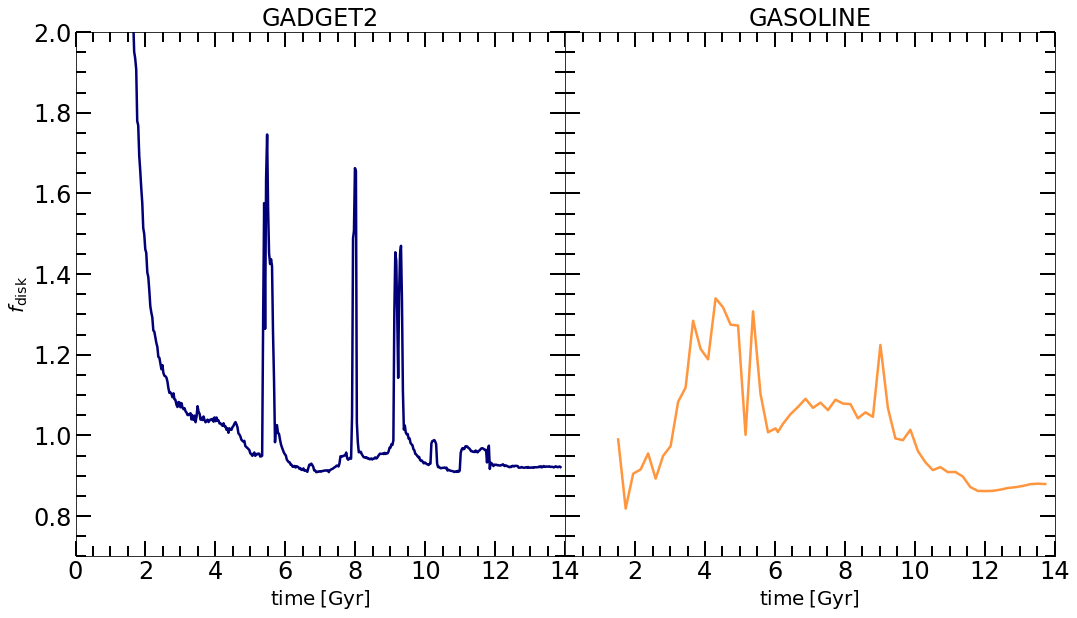

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax[0].plot(time_MWgd, fdisk_MWgd, '-', lw=2.5, color='#020076')
ax[0].set_ylim(0.7,2)
ax[0].set_xlim(0,14)
ax[0].set_xticks([0,2,4,6,8,10,12,14])
ax[0].set_ylabel(r'$f_{\mathrm{disk}}$',fontsize=20)
ax[0].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[0].minorticks_on()
ax[0].tick_params( labelsize=24)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[0].set_title('GADGET2', loc='center', fontsize=24)

#------------------------------------------------------

# # ax2=fig.add_subplot(222)
ax[1].plot(time_MWgs, fdisk_MWgs, '-', lw=2.5, color='#FF963E')
ax[1].set_ylim(0.7,2)
ax[1].set_xlim(0,14)
ax[1].set_yticklabels([])
ax[1].set_xticks([2,4,6,8,10,12,14])
ax[1].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[1].minorticks_on()
ax[1].tick_params( labelsize=24)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].set_title('GASOLINE', loc='center', fontsize=24)

plt.show()

## r50 vs time


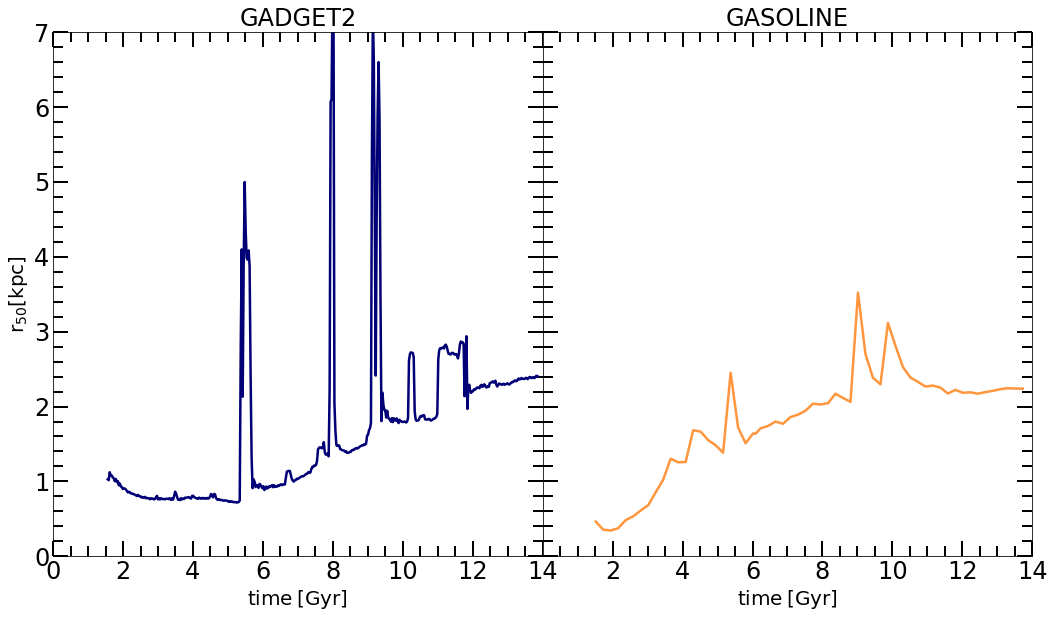

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax[0].plot(time_MWgd, r50_MWgd, '-', lw=2.5, color='#020076',label='Gadget')
# ax[0].plot(time_MWgs, r50_MWgs, '-', lw=2.5, color='#FF963E',label='Gasoline')

ax[0].set_ylim(0,7)
ax[0].set_xlim(0,14)
ax[0].set_xticks([0,2,4,6,8,10,12,14])
ax[0].set_ylabel(r'$\mathrm{r_{50}[kpc]}$',fontsize=20)
ax[0].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[0].minorticks_on()
ax[0].tick_params( labelsize=24)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')
# ax[0].legend(fontsize=20,frameon=False)
ax[0].set_title('GADGET2', loc='center', fontsize=24)

#------------------------------------------------------

# # ax2=fig.add_subplot(222)
ax[1].plot(time_MWgs, r50_MWgs, '-', lw=2.5, color='#FF963E')
ax[1].set_ylim(0,7)
ax[1].set_xlim(0,14)
ax[1].set_xticks([2,4,6,8,10,12,14])
ax[1].set_yticklabels([])
ax[1].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[1].minorticks_on()
ax[1].tick_params( labelsize=24)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].set_title('GASOLINE', loc='center', fontsize=24)

plt.show()

## r200 vs time

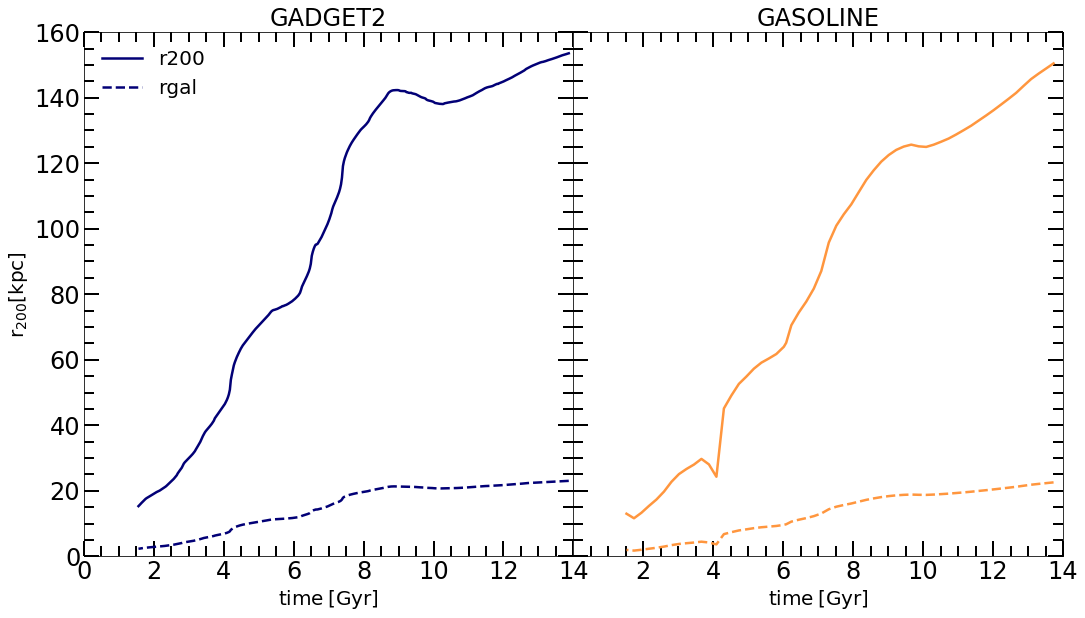

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax[0].plot(time_MWgd, r200_MWgd, '-', lw=2.5, color='#020076',label='r200')
ax[0].plot(time_MWgd, r200_MWgd*0.15, '--', lw=2.5, color='#020076',label='rgal')
ax[0].set_ylim(0,160)
ax[0].set_xlim(0,14)
ax[0].set_xticks([0,2,4,6,8,10,12,14])
ax[0].set_ylabel(r'$\mathrm{r_{200}[kpc]}$',fontsize=20)
ax[0].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[0].minorticks_on()
ax[0].tick_params( labelsize=24)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')
ax[0].legend(fontsize=20, frameon=False)
ax[0].set_title('GADGET2', loc='center', fontsize=24)

#------------------------------------------------------

# # ax2=fig.add_subplot(222)
ax[1].plot(time_MWgs, r200_MWgs, '-', lw=2.5, color='#FF963E')
ax[1].plot(time_MWgs, r200_MWgs*0.15, '--', lw=2.5, color='#FF963E')
ax[1].set_ylim(0,160)
ax[1].set_xlim(0,14)
ax[1].set_xticks([2,4,6,8,10,12,14])
ax[1].set_yticklabels([])
ax[1].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[1].minorticks_on()
ax[1].tick_params( labelsize=24)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].set_title('GASOLINE', loc='center', fontsize=24)

plt.show()

## log(Mass_50) vs time

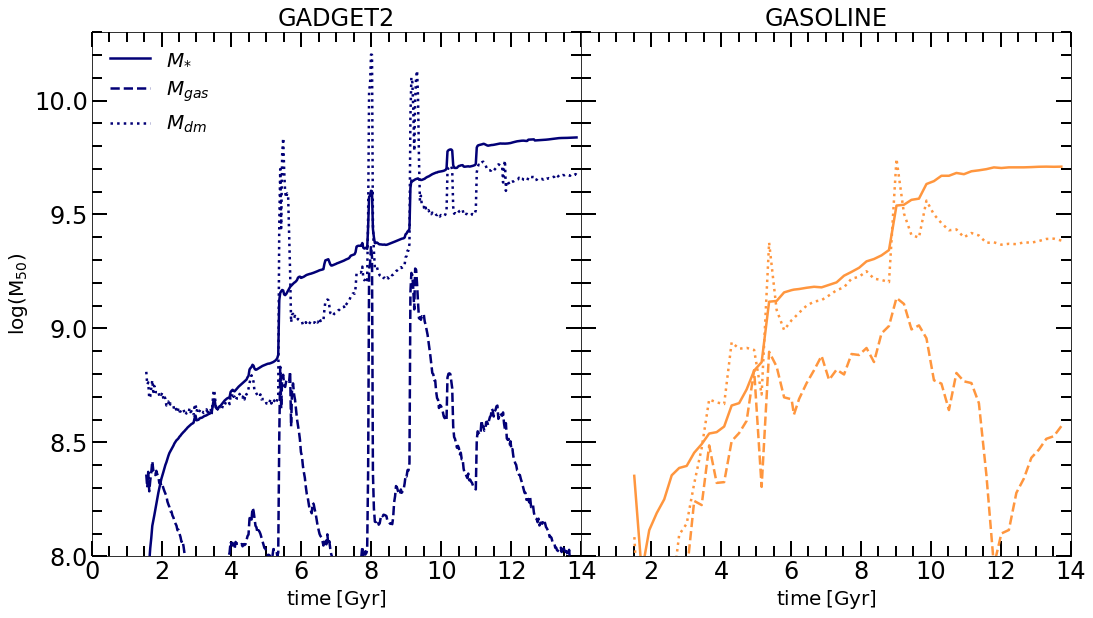

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax[0].plot(time_MWgd, np.log10(M50_MWgd), '-', lw=2.5, color='#020076',label =r'$M_{*}$')
ax[0].plot(time_MWgd, np.log10(Mg50_MWgd), '--', lw=2.5, color='#020076',label =r'$M_{gas}$')
ax[0].plot(time_MWgd, np.log10(Md50_MWgd), ':', lw=2.5, color='#020076',label =r'$M_{dm}$')
ax[0].set_ylim(8,10.3)
ax[0].set_xlim(0,14)
ax[0].set_xticks([0,2,4,6,8,10,12,14])
ax[0].set_ylabel(r'$\mathrm{log(M_{50})}$',fontsize=20)
ax[0].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[0].minorticks_on()
ax[0].tick_params( labelsize=24)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')
ax[0].legend(fontsize=20,frameon = False)
ax[0].set_title('GADGET2', loc='center', fontsize=24)

#------------------------------------------------------

# # ax2=fig.add_subplot(222)
ax[1].plot(time_MWgs, np.log10(M50_MWgs), '-', lw=2.5, color='#FF963E')
ax[1].plot(time_MWgs, np.log10(Mg50_MWgs), '--', lw=2.5, color='#FF963E')
ax[1].plot(time_MWgs, np.log10(Md50_MWgs), ':', lw=2.5, color='#FF963E')

ax[1].set_ylim(8,10.3)
ax[1].set_xlim(0,14)
ax[1].set_xticks([2,4,6,8,10,12,14])
ax[1].set_yticklabels([])
ax[1].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[1].minorticks_on()
ax[1].tick_params( labelsize=24)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].set_title('GASOLINE', loc='center', fontsize=24)

plt.show()

## log(Mgal) vs time 

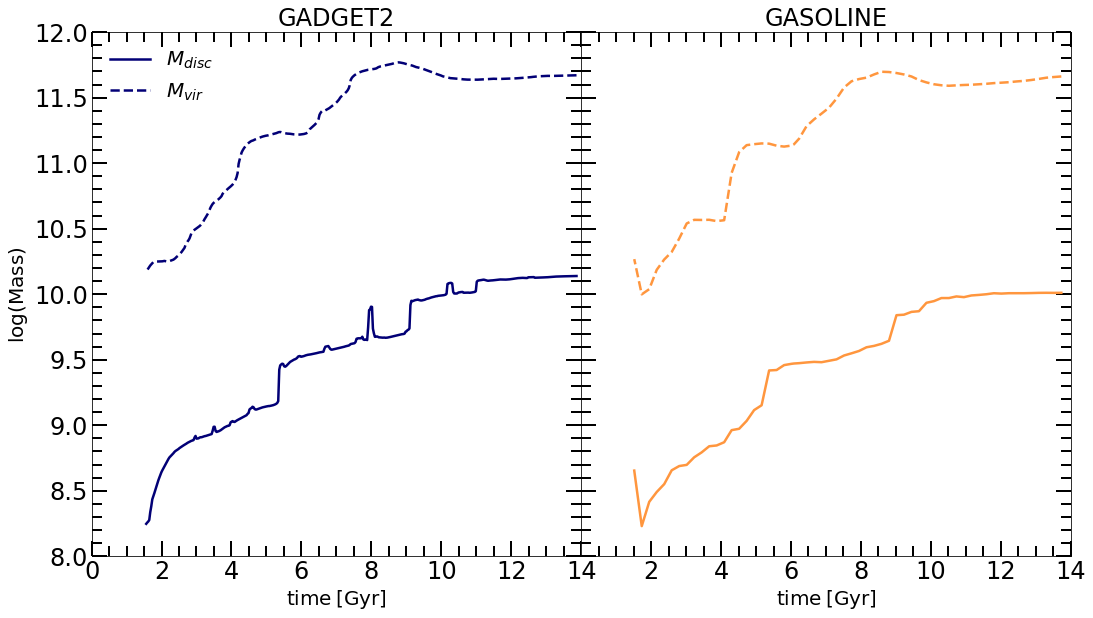

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax[0].plot(time_MWgd, np.log10(Mgal_MWgd), '-', lw=2.5, color='#020076',label =r'$M_{disc}$')
ax[0].plot(time_MWgd, np.log10(Mvir_MWgd), '--', lw=2.5, color='#020076',label =r'$M_{vir}$')
# ax[0].plot(time_MWgd, np.log10(Md50_MWgd), ':', lw=2.5, color='#801414',label =r'$M_{dm}$')
ax[0].set_ylim(8,12)
ax[0].set_xlim(0,14)
ax[0].set_xticks([0,2,4,6,8,10,12,14])
ax[0].set_ylabel(r'$\mathrm{log(Mass)}$',fontsize=20)
ax[0].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[0].minorticks_on()
ax[0].tick_params( labelsize=24)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')
ax[0].legend(fontsize=20,frameon = False)
ax[0].set_title('GADGET2', loc='center', fontsize=24)

#------------------------------------------------------

# # ax2=fig.add_subplot(222)
ax[1].plot(time_MWgs, np.log10(Mgal_MWgs), '-', lw=2.5, color='#FF963E')
ax[1].plot(time_MWgs, np.log10(Mvir_MWgs), '--', lw=2.5, color='#FF963E')
# ax[1].plot(time_MWgs, np.log10(Md50_MWgs), ':', lw=2.5, color='#FF0000')

ax[1].set_ylim(8,12)
ax[1].set_xlim(0,14)
ax[1].set_xticks([2,4,6,8,10,12,14])
ax[1].set_yticklabels([])
ax[1].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[1].minorticks_on()
ax[1].tick_params( labelsize=24)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].set_title('GASOLINE', loc='center', fontsize=24)

plt.show()

## Masses vs time

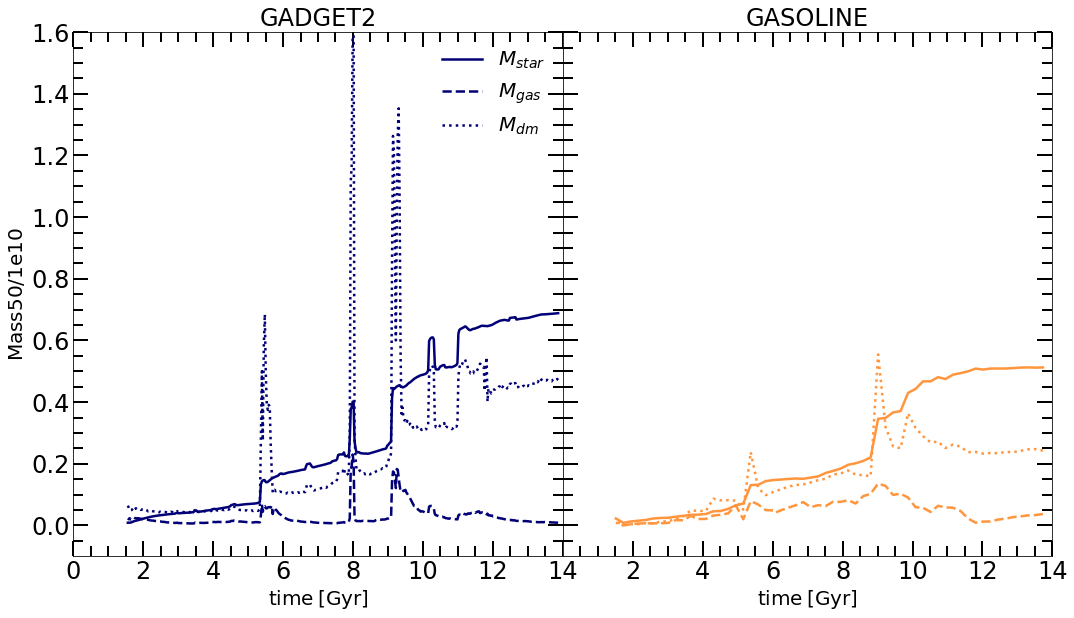

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax[0].plot(time_MWgd, M50_MWgd*1e-10, '-', lw=2.5, color='#020076',label =r'$M_{star}$')
ax[0].plot(time_MWgd, Mg50_MWgd*1e-10, '--', lw=2.5, color='#020076',label =r'$M_{gas}$')
ax[0].plot(time_MWgd, Md50_MWgd*1e-10, ':', lw=2.5, color='#020076',label =r'$M_{dm}$')
ax[0].set_ylim(-0.1,1.6)
ax[0].set_xlim(0,14)
ax[0].set_xticks([0,2,4,6,8,10,12,14])
ax[0].set_ylabel(r'$\mathrm{Mass50/1e10}$',fontsize=20)
ax[0].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[0].minorticks_on()
ax[0].tick_params( labelsize=24)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')
ax[0].legend(fontsize=20,frameon = False)
ax[0].set_title('GADGET2', loc='center', fontsize=24)

#------------------------------------------------------

# # ax2=fig.add_subplot(222)
ax[1].plot(time_MWgs, M50_MWgs*1e-10, '-', lw=2.5, color='#FF963E')
ax[1].plot(time_MWgs, Mg50_MWgs*1e-10, '--', lw=2.5, color='#FF963E')
ax[1].plot(time_MWgs, Md50_MWgs*1e-10, ':', lw=2.5, color='#FF963E')

ax[1].set_ylim(-0.1,1.6)
ax[1].set_xlim(0,14)
ax[1].set_xticks([2,4,6,8,10,12,14])
ax[1].set_yticklabels([])
ax[1].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[1].minorticks_on()
ax[1].tick_params( labelsize=24)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].set_title('GASOLINE', loc='center', fontsize=24)

plt.show()

## Mgal, Mvir vs time 

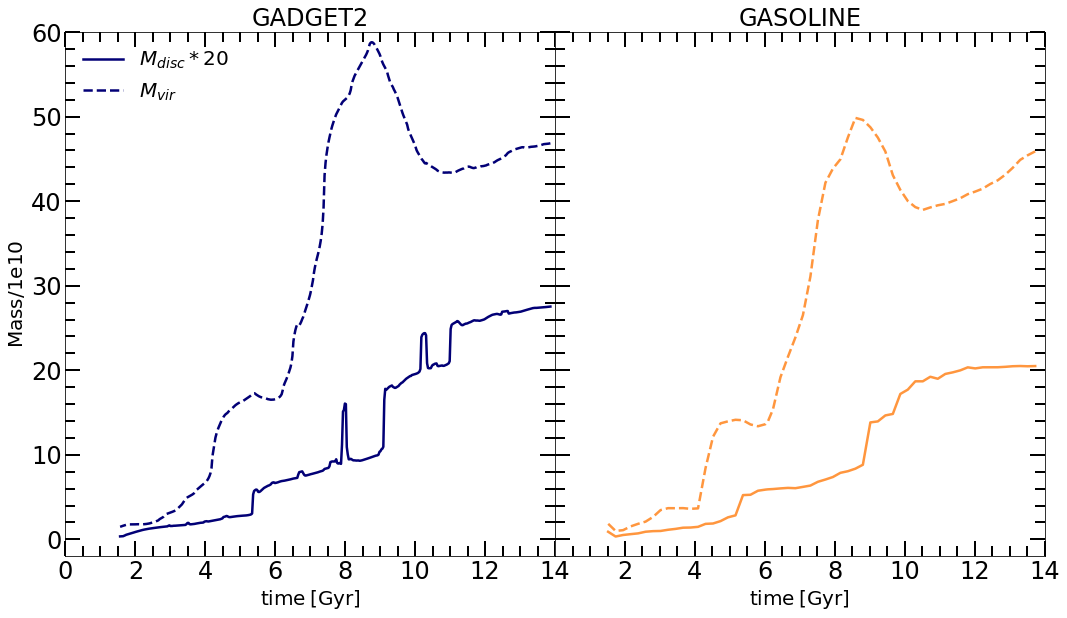

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax[0].plot(time_MWgd, Mgal_MWgd*20*1e-10, '-', lw=2.5, color='#020076',label =r'$M_{disc}*20$')
ax[0].plot(time_MWgd, Mvir_MWgd*1e-10, '--', lw=2.5, color='#020076',label =r'$M_{vir}$')

# ax[0].plot(time_MWgs, Mgal_MWgs*20*1e-10, '-', lw=2.5, color='#FF0000')
# ax[0].plot(time_MWgs, Mvir_MWgs*1e-10, '--', lw=2.5, color='#FF0000')
# ax[0].plot(time_MWgd, Md50_MWgd*1e-10, ':', lw=2.5, color='#801414',label =r'$M_{dm}$')
ax[0].set_ylim(-2,60)
ax[0].set_xlim(0,14)
ax[0].set_xticks([0,2,4,6,8,10,12,14])
ax[0].set_ylabel(r'$\mathrm{Mass/1e10}$',fontsize=20)
ax[0].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[0].minorticks_on()
ax[0].tick_params( labelsize=24)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')
ax[0].legend(fontsize=20,frameon = False)
ax[0].set_title('GADGET2', loc='center', fontsize=24)

#------------------------------------------------------

# # ax2=fig.add_subplot(222)
ax[1].plot(time_MWgs, Mgal_MWgs*20*1e-10, '-', lw=2.5, color='#FF963E')
ax[1].plot(time_MWgs, Mvir_MWgs*1e-10, '--', lw=2.5, color='#FF963E')
# ax[1].plot(time_MWgs, Md50_MWgs*1e-10, ':', lw=2.5, color='#FF0000')

ax[1].set_ylim(-2,60)
ax[1].set_xlim(0,14)
ax[1].set_xticks([2,4,6,8,10,12,14])
ax[1].set_yticklabels([])
ax[1].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[1].minorticks_on()
ax[1].tick_params( labelsize=24)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].set_title('GASOLINE', loc='center', fontsize=24)

plt.show()

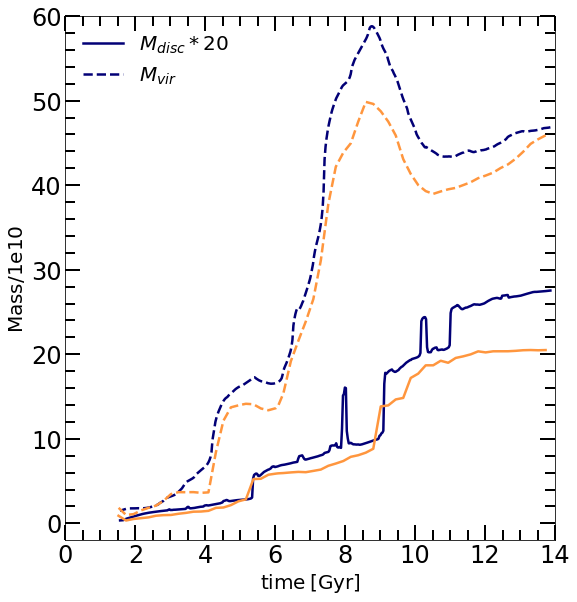

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax.plot(time_MWgd, Mgal_MWgd*20*1e-10, '-', lw=2.5, color='#020076',label =r'$M_{disc}*20$')
ax.plot(time_MWgd, Mvir_MWgd*1e-10, '--', lw=2.5, color='#020076',label =r'$M_{vir}$')

ax.plot(time_MWgs, Mgal_MWgs*20*1e-10, '-', lw=2.5, color='#FF963E')
ax.plot(time_MWgs, Mvir_MWgs*1e-10, '--', lw=2.5, color='#FF963E')
# ax[0].plot(time_MWgd, Md50_MWgd*1e-10, ':', lw=2.5, color='#801414',label =r'$M_{dm}$')
ax.set_ylim(-2,60)
ax.set_xlim(0,14)
ax.set_xticks([0,2,4,6,8,10,12,14])
ax.set_ylabel(r'$\mathrm{Mass/1e10}$',fontsize=20)
ax.set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')
ax.legend(fontsize=20,frameon = False)



plt.show()

## log(Mass50/M*) vs time

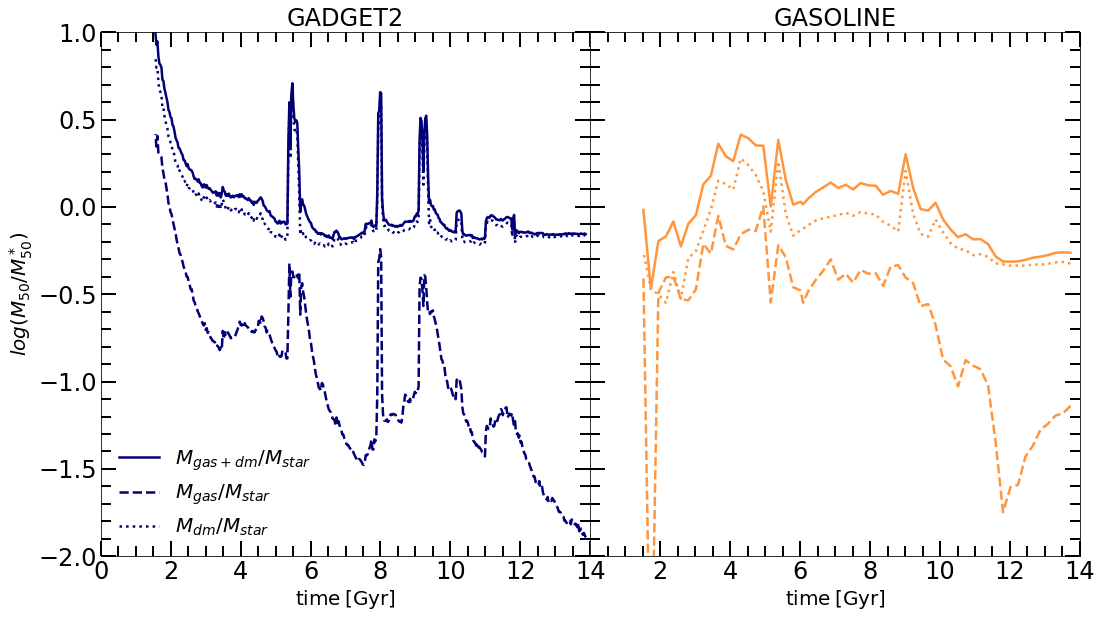

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax[0].plot(time_MWgd, np.log10(Mg50_MWgd+Md50_MWgd)-np.log10(M50_MWgd), '-', lw=2.5, color='#020076',label =r'$M_{gas+dm}/M_{star}$')
ax[0].plot(time_MWgd, np.log10(Mg50_MWgd)-np.log10(M50_MWgd), '--', lw=2.5, color='#020076',label =r'$M_{gas}/M_{star}$')
ax[0].plot(time_MWgd, np.log10(Md50_MWgd)-np.log10(M50_MWgd), ':', lw=2.5, color='#020076',label =r'$M_{dm}/M_{star}$')
ax[0].set_ylim(-2,1)
ax[0].set_xlim(0,14)
ax[0].set_xticks([0,2,4,6,8,10,12,14])
ax[0].set_ylabel(r'$log(M_{50}/M^*_{50})$',fontsize=20)
ax[0].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[0].minorticks_on()
ax[0].tick_params( labelsize=24)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')
ax[0].legend(fontsize=20,frameon = False)
ax[0].set_title('GADGET2', loc='center', fontsize=24)

#------------------------------------------------------

# # ax2=fig.add_subplot(222)
ax[1].plot(time_MWgs, np.log10(Mg50_MWgs+Md50_MWgs)-np.log10(M50_MWgs), '-', lw=2.5, color='#FF963E')
ax[1].plot(time_MWgs, np.log10(Mg50_MWgs)-np.log10(M50_MWgs), '--', lw=2.5, color='#FF963E')
ax[1].plot(time_MWgs, np.log10(Md50_MWgs)-np.log10(M50_MWgs), ':', lw=2.5, color='#FF963E')

ax[1].set_ylim(-2,1)
ax[1].set_xlim(0,14)
ax[1].set_xticks([2,4,6,8,10,12,14])
ax[1].set_yticklabels([])
ax[1].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[1].minorticks_on()
ax[1].tick_params( labelsize=24)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].set_title('GASOLINE', loc='center', fontsize=24)

plt.show()

## Mass50/M* vs time

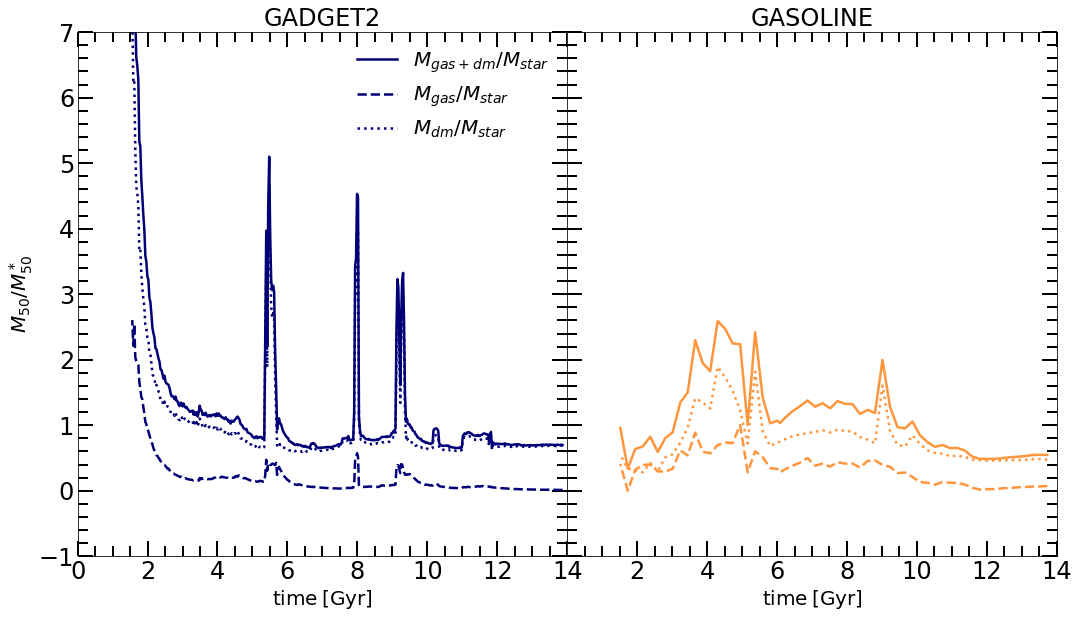

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax[0].plot(time_MWgd, (Mg50_MWgd+Md50_MWgd)/M50_MWgd, '-', lw=2.5, color='#020076',label =r'$M_{gas+dm}/M_{star}$')
ax[0].plot(time_MWgd, Mg50_MWgd/M50_MWgd, '--', lw=2.5, color='#020076',label =r'$M_{gas}/M_{star}$')
ax[0].plot(time_MWgd, Md50_MWgd/M50_MWgd, ':', lw=2.5, color='#020076',label =r'$M_{dm}/M_{star}$')
ax[0].set_ylim(-1,7)
ax[0].set_xlim(0,14)
ax[0].set_xticks([0,2,4,6,8,10,12,14])
ax[0].set_ylabel(r'$M_{50}/M^*_{50}$',fontsize=20)
ax[0].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[0].minorticks_on()
ax[0].tick_params( labelsize=24)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')
ax[0].legend(fontsize=20,frameon = False)
ax[0].set_title('GADGET2', loc='center', fontsize=24)

#------------------------------------------------------

# # ax2=fig.add_subplot(222)
ax[1].plot(time_MWgs, (Mg50_MWgs+Md50_MWgs)/M50_MWgs, '-', lw=2.5, color='#FF963E')
ax[1].plot(time_MWgs, Mg50_MWgs/M50_MWgs, '--', lw=2.5, color='#FF963E')
ax[1].plot(time_MWgs, Md50_MWgs/M50_MWgs, ':', lw=2.5, color='#FF963E')
ax[1].set_ylim(-1,7)
ax[1].set_xlim(0,14)
ax[1].set_xticks([2,4,6,8,10,12,14])
ax[1].set_yticklabels([])
ax[1].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[1].minorticks_on()
ax[1].tick_params( labelsize=24)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].set_title('GASOLINE', loc='center', fontsize=24)

plt.show()

## Vr50 vs time

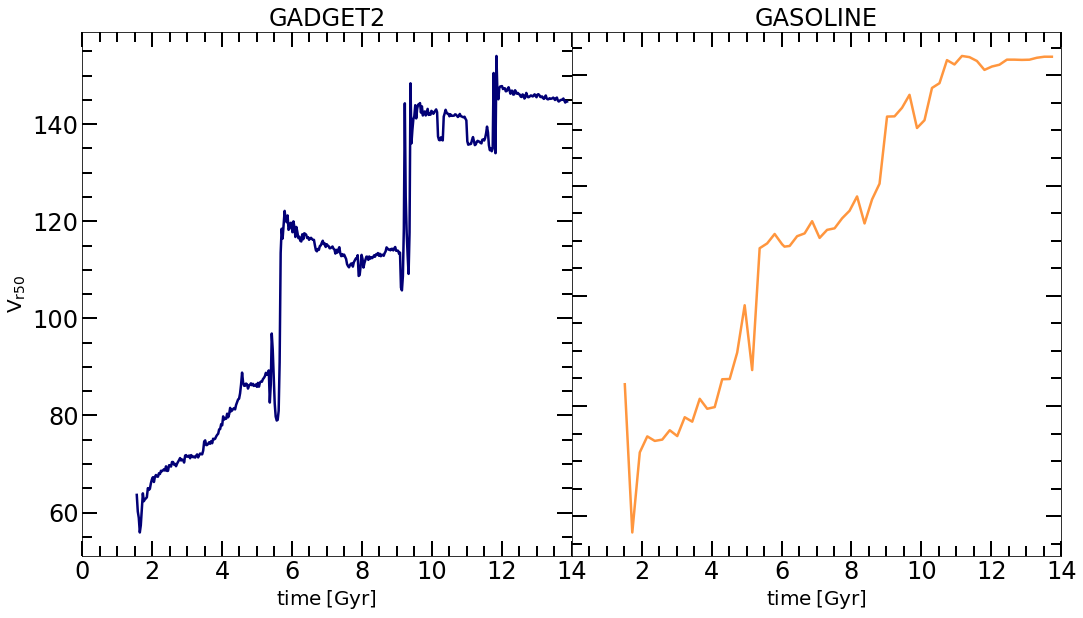

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax[0].plot(time_MWgd, Vr50_MWgd, '-', lw=2.5, color='#020076')
# ax[0].set_ylim(8,10.5)
ax[0].set_xlim(0,14)
ax[0].set_xticks([0,2,4,6,8,10,12,14])
ax[0].set_ylabel(r'$\mathrm{V_{r50}}$',fontsize=20)
ax[0].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[0].minorticks_on()
ax[0].tick_params( labelsize=24)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[0].set_title('GADGET2', loc='center', fontsize=24)

#------------------------------------------------------

# # ax2=fig.add_subplot(222)
ax[1].plot(time_MWgs, Vr50_MWgs, '-', lw=2.5, color='#FF963E')
# ax[1].set_ylim(8,10.5)
ax[1].set_xlim(0,14)
ax[1].set_xticks([2,4,6,8,10,12,14])
ax[1].set_yticklabels([])
ax[1].set_xlabel(r'$\mathrm{time\:[Gyr]}$',fontsize=20)
ax[1].minorticks_on()
ax[1].tick_params( labelsize=24)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].set_title('GASOLINE', loc='center', fontsize=24)

plt.show()

496


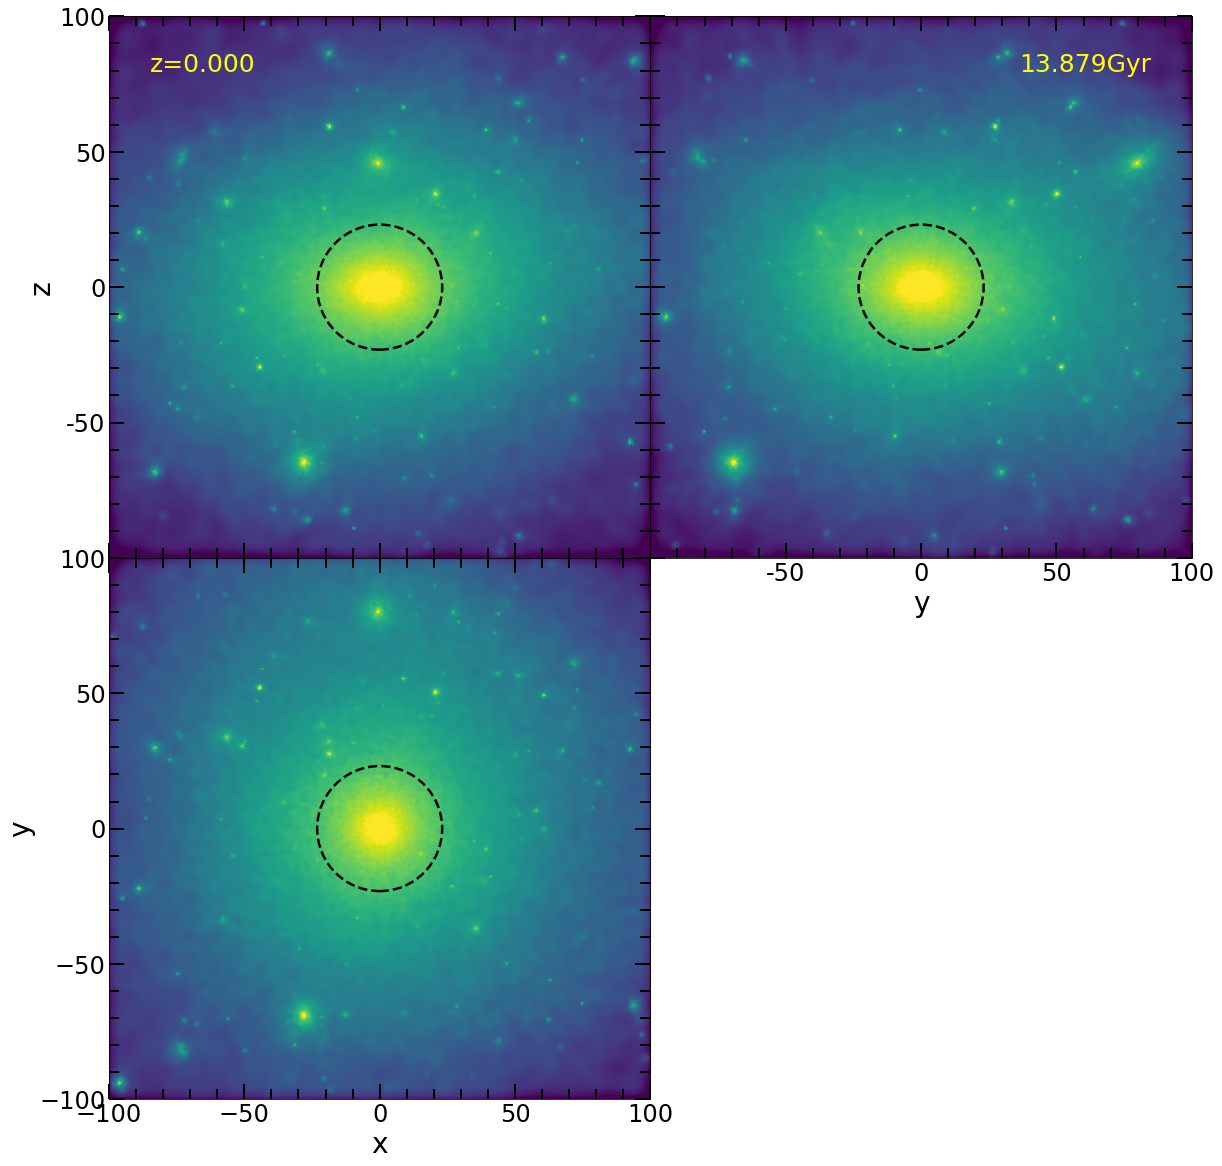

In [3]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import barstrength2 as strng
import time_conversion as tiempo
import sphviewer as sph
# from mpl_toolkits.axes_grid1 import make_axes_locatable


h=0.73005
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
vector2 = ('M31','MW','M33')
vector = ('00','01','03')
vector3 = ('A','B')
# carpeta = ('9in1_M31/','9in1_MW_new/')
carpeta = ('test_stefan/')


#path = 'home/ornela/SimCLUES/'
path = '/home/omarioni/'

atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
# aexp = aexp[::-1]

path = '/mnt/is2/alejandro/ornella/'

snapshot=range(496,495,-1)
for isnap in snapshot:
    snap = h5py.File(path + 'outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    print isnap
#     for i in range(1,2):

    i=1
    
    cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'][()]
    r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'][()]

    pstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Coordinates'][()]
    mstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'][()]
    vel  = snap['subhalo_0'+ str('%s' %vector[i])+ '/Str/Velocities'][()]

    pdrk = snap['subhalo_0'+ str('%s' %vector[i]) + '/Drk/Coordinates'][()]
    mdrk = snap['subhalo_0'+ str('%s' %vector[i]) + '/Drk/Masses'][()]

    z = a0/aexp[isnap] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    time = tiempo.conv(z, h, omega_lambda, omega_matter)

#         print isnap#, time

    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
    ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
    zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    xdrk = (pdrk[:,0]-cm[0])*aexp[isnap]/h
    ydrk = (pdrk[:,1]-cm[1])*aexp[isnap]/h
    zdrk = (pdrk[:,2]-cm[2])*aexp[isnap]/h
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.

    #----------------------masas----------------------------
    mstr = mstr/h
    mdrk = mdrk/h

    r200 = r200*aexp[isnap]/h
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = np.cumsum((mstr[limit])[r_indice])
    M_gal = Mc_str[-1]

    #------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]
    r50 = r_sort[cincuenta][-1]             

    #--------------------------------------------         
    veloc,=np.where(r<r50)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    #----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp[isnap])

# posiciones de particulas que se quiere graficar
# como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    xn_drk = e1x*xdrk + e1y*ydrk + e1z*zdrk
    yn_drk = e2x*xdrk + e2y*ydrk + e2z*zdrk
    zn_drk = e3x*xdrk + e3y*ydrk + e3z*zdrk


    pos=np.ndarray([np.size(xn),4])
    pos[:,0]=xn
    pos[:,1]=yn
    pos[:,2]=zn
    pos[:,3]=mstr

    pos2=np.ndarray([np.size(xn_drk),4])
    pos2[:,0]=xn_drk
    pos2[:,1]=yn_drk
    pos2[:,2]=zn_drk
    pos2[:,3]=mdrk


    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

    fig.subplots_adjust(bottom=0.01, left =0.03, right = 0.97, top = 0.95, wspace=0.0, hspace= 0.0)

    #----------------------------------------------------------------------

    #---------------------generador del grafico3-----------------
    rl= 100   
    corte,=np.where((xn_drk <rl) & (yn_drk <rl) & (zn_drk <rl) & (xn_drk >-rl) & (yn_drk >-rl) & (zn_drk >-rl))


    #-----rango que tiene la escala  de colores-----
    vmin=4.5
    vmax=6.7

    # ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='viridis'

    #         nb1 = 300 
    nb1 = 25
    npixel = 1000

    particles=sph.Particles(pos2[corte,:3],mdrk[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()

    ax[1,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[1,0].set_xlim(-100,100)
    ax[1,0].set_ylim(-100,100)
    ax[1,0].set_xticks([-100,-50,0,50,100])
    ax[1,0].set_yticks([-100,-50,0,50,100])
    ax[1,0].set_xlabel('x',fontsize=28)
    ax[1,0].set_ylabel('y',fontsize=28)
    ax[1,0].minorticks_on()
    ax[1,0].tick_params( labelsize=24)
    ax[1,0].tick_params('both', length=10, width=2,which='minor', direction='in', right=True,top=True)
    ax[1,0].tick_params('both', length=15, width=2,which='major', direction='in', right=True,top=True)
    ax[1,0].add_patch(plt.Circle((0,0),radius=rgal,ec='k',fc=None,ls='--',lw=2.5, fill=False))
    #     ax[0,1].set_xticklabels([])
    #     ax[0,1].set_yticklabels([])
    #     ax[0,1].annotate("",xy=(-40, -40), xycoords='data',xytext=(-10, -40),textcoords='data',
    #                  ha='center', va='center', 
    #                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

    #     ax[2,0].text(-25, -40, '30kpc', fontsize=25, color='white', ha='center', va='bottom')


    #--------------------------------------
    particles=sph.Particles(pos2[corte,:3],mdrk[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()


    ax[0,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[0,0].set_xlim(-100,100)
    ax[0,0].set_ylim(-100,100)
    ax[0,0].set_xticks([-100,-50,0,50,100])
    ax[0,0].set_yticks([-50,0,50,100])
    ax[0,0].set_xticklabels([])
    ax[0,0].set_yticklabels([-50,0,50,100])
    ax[0,0].set_ylabel('z',fontsize=28)
    ax[0,0].minorticks_on()
    ax[0,0].tick_params( labelsize=24)
    ax[0,0].tick_params('both', length=10, width=2,which='minor', direction='in', right=True,top=True)
    ax[0,0].tick_params('both', length=15, width=2,which='major', direction='in', right=True,top=True)
    ax[0,0].text(-85, 82,'z='+str('%.3f'%z), fontsize=25, color='yellow', ha='left', va='center') 
    ax[0,0].add_patch(plt.Circle((0,0),radius=rgal,ec='k',fc=None,ls='--',lw=2.5, fill=False))

#     #--------------------------------------
    particles=sph.Particles(pos2[corte,:3],mdrk[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90,p=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()


    ax[0,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[0,1].set_xlim(-100,100)
    ax[0,1].set_ylim(-100,100)
    ax[0,1].set_xticks([-50,0,50,100])
    ax[0,1].set_yticks([-100,-50,0,50,100])
    ax[0,1].set_yticklabels([])
    ax[0,1].set_xticklabels([-50,0,50,100])
    ax[0,1].minorticks_on()
    ax[0,1].tick_params( labelsize=24)
    ax[0,1].tick_params('both', length=10, width=2,which='minor', direction='in', right=True,top=True)
    ax[0,1].tick_params('both', length=15, width=2,which='major', direction='in', right=True,top=True)
    ax[0,1].set_xlabel('y',fontsize=28)
    ax[0,1].text(85, 82, str('%.3f'%time)+'Gyr', fontsize=25, color='yellow', ha='right', va='center') 
    ax[0,1].add_patch(plt.Circle((0,0),radius=rgal,ec='k',fc=None,ls='--',lw=2.5, fill=False))


    ax[1,1].axis('off')

    plt.show()

496


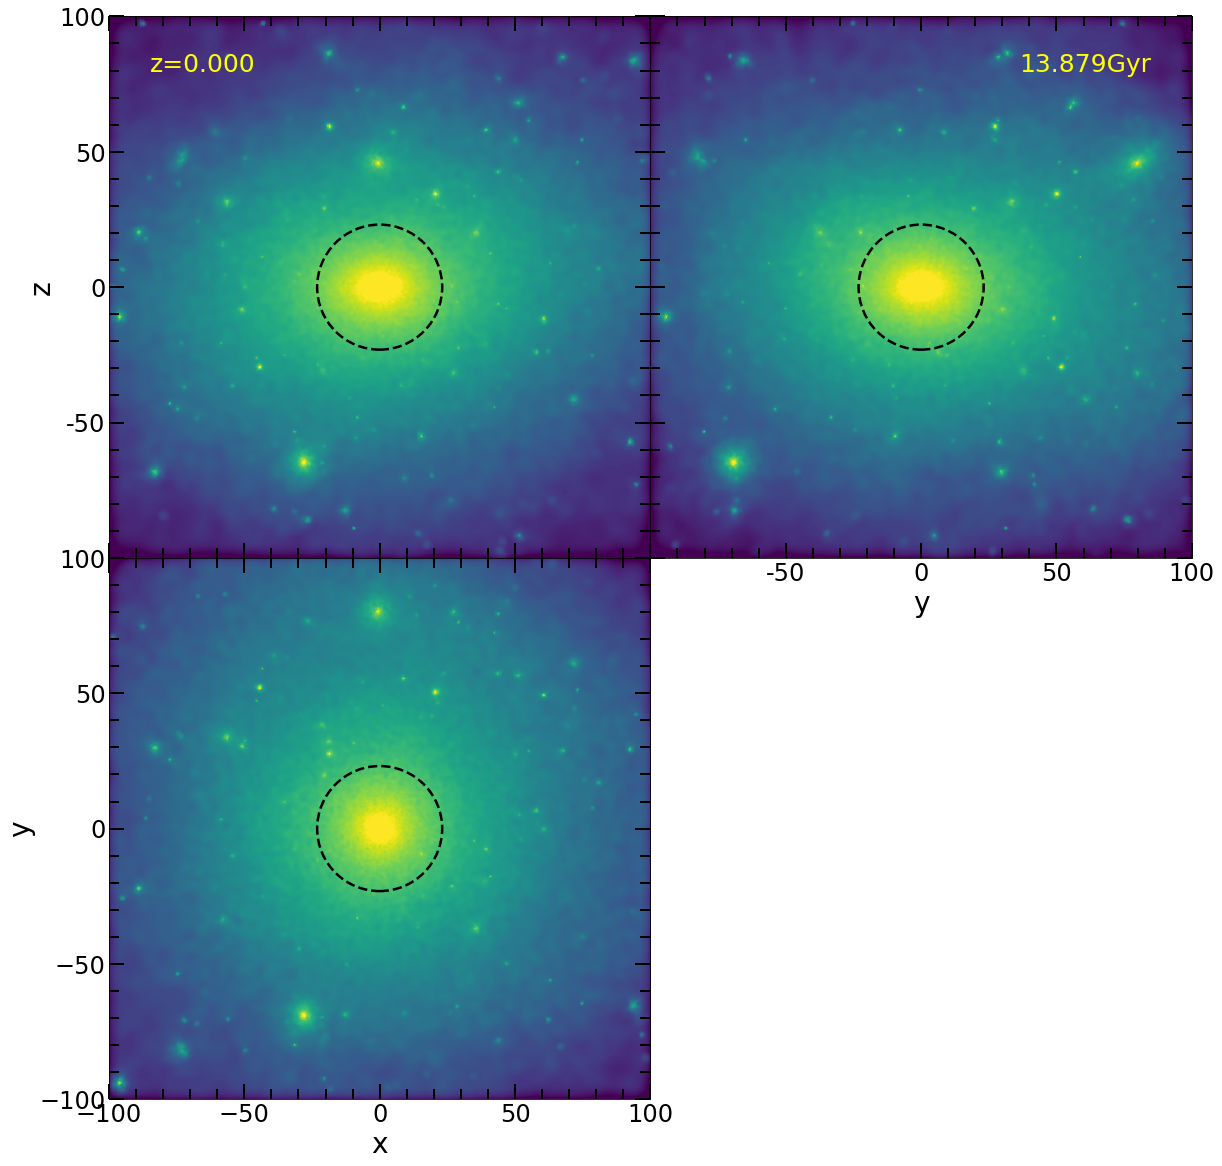

In [5]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import barstrength2 as strng
import time_conversion as tiempo
import sphviewer as sph
# from mpl_toolkits.axes_grid1 import make_axes_locatable


h=0.73005
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
vector2 = ('M31','MW','M33')
vector = ('00','01','03')
vector3 = ('A','B')
# carpeta = ('9in1_M31/','9in1_MW_new/')
# carpeta = ('test_stefan/')


#path = 'home/ornela/SimCLUES/'
path = '/home/omarioni/'

atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
# aexp = aexp[::-1]

path = '/mnt/is2/alejandro/ornella/'

snapshot=range(496,495,-1)
for isnap in snapshot:
    snap = h5py.File(path + 'outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    print isnap
#     for i in range(1,2):

    i=1
    
    cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'][()]
    r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'][()]

    pstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Coordinates'][()]
    mstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'][()]
    vel  = snap['subhalo_0'+ str('%s' %vector[i])+ '/Str/Velocities'][()]

    pdrk = snap['subhalo_0'+ str('%s' %vector[i]) + '/Drk/Coordinates'][()]
    mdrk = snap['subhalo_0'+ str('%s' %vector[i]) + '/Drk/Masses'][()]

    z = a0/aexp[isnap] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    time = tiempo.conv(z, h, omega_lambda, omega_matter)

#         print isnap#, time

    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
    ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
    zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    xdrk = (pdrk[:,0]-cm[0])*aexp[isnap]/h
    ydrk = (pdrk[:,1]-cm[1])*aexp[isnap]/h
    zdrk = (pdrk[:,2]-cm[2])*aexp[isnap]/h
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.

    #----------------------masas----------------------------
    mstr = mstr/h
    mdrk = mdrk/h

    r200 = r200*aexp[isnap]/h
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = np.cumsum((mstr[limit])[r_indice])
    M_gal = Mc_str[-1]

    #------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]
    r50 = r_sort[cincuenta][-1]             

    #--------------------------------------------         
    veloc,=np.where(r<r50)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    #----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp[isnap])

# posiciones de particulas que se quiere graficar
# como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    xn_drk = e1x*xdrk + e1y*ydrk + e1z*zdrk
    yn_drk = e2x*xdrk + e2y*ydrk + e2z*zdrk
    zn_drk = e3x*xdrk + e3y*ydrk + e3z*zdrk


    pos=np.ndarray([np.size(xn),4])
    pos[:,0]=xn
    pos[:,1]=yn
    pos[:,2]=zn
    pos[:,3]=mstr

    pos2=np.ndarray([np.size(xn_drk),4])
    pos2[:,0]=xn_drk
    pos2[:,1]=yn_drk
    pos2[:,2]=zn_drk
    pos2[:,3]=mdrk


    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

    fig.subplots_adjust(bottom=0.01, left =0.03, right = 0.97, top = 0.95, wspace=0.0, hspace= 0.0)

    #----------------------------------------------------------------------

    #---------------------generador del grafico3-----------------
    rl= 100   
    corte,=np.where((xn_drk <rl) & (yn_drk <rl) & (zn_drk <rl) & (xn_drk >-rl) & (yn_drk >-rl) & (zn_drk >-rl))


    #-----rango que tiene la escala  de colores-----
    vmin=4.5
    vmax=6.7

    # ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='viridis'

    #         nb1 = 300 
    nb1 = 25
    npixel = 1000

    particles=sph.Particles(pos2[corte,:3],mdrk[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()

    ax[1,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[1,0].set_xlim(-100,100)
    ax[1,0].set_ylim(-100,100)
    ax[1,0].set_xticks([-100,-50,0,50,100])
    ax[1,0].set_yticks([-100,-50,0,50,100])
    ax[1,0].set_xlabel('x',fontsize=28)
    ax[1,0].set_ylabel('y',fontsize=28)
    ax[1,0].minorticks_on()
    ax[1,0].tick_params( labelsize=24)
    ax[1,0].tick_params('both', length=10, width=2,which='minor', direction='in', right=True,top=True)
    ax[1,0].tick_params('both', length=15, width=2,which='major', direction='in', right=True,top=True)
    ax[1,0].add_patch(plt.Circle((0,0),radius=rgal,ec='k',fc=None,ls='--',lw=2.5, fill=False))
    #     ax[0,1].set_xticklabels([])
    #     ax[0,1].set_yticklabels([])
    #     ax[0,1].annotate("",xy=(-40, -40), xycoords='data',xytext=(-10, -40),textcoords='data',
    #                  ha='center', va='center', 
    #                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

    #     ax[2,0].text(-25, -40, '30kpc', fontsize=25, color='white', ha='center', va='bottom')


    #--------------------------------------
    particles=sph.Particles(pos2[corte,:3],mdrk[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()


    ax[0,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[0,0].set_xlim(-100,100)
    ax[0,0].set_ylim(-100,100)
    ax[0,0].set_xticks([-100,-50,0,50,100])
    ax[0,0].set_yticks([-50,0,50,100])
    ax[0,0].set_xticklabels([])
    ax[0,0].set_yticklabels([-50,0,50,100])
    ax[0,0].set_ylabel('z',fontsize=28)
    ax[0,0].minorticks_on()
    ax[0,0].tick_params( labelsize=24)
    ax[0,0].tick_params('both', length=10, width=2,which='minor', direction='in', right=True,top=True)
    ax[0,0].tick_params('both', length=15, width=2,which='major', direction='in', right=True,top=True)
    ax[0,0].text(-85, 82,'z='+str('%.3f'%z), fontsize=25, color='yellow', ha='left', va='center') 
    ax[0,0].add_patch(plt.Circle((0,0),radius=rgal,ec='k',fc=None,ls='--',lw=2.5, fill=False))

#     #--------------------------------------
    particles=sph.Particles(pos2[corte,:3],mdrk[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90,p=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()


    ax[0,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[0,1].set_xlim(-100,100)
    ax[0,1].set_ylim(-100,100)
    ax[0,1].set_xticks([-50,0,50,100])
    ax[0,1].set_yticks([-100,-50,0,50,100])
    ax[0,1].set_yticklabels([])
    ax[0,1].set_xticklabels([-50,0,50,100])
    ax[0,1].minorticks_on()
    ax[0,1].tick_params( labelsize=24)
    ax[0,1].tick_params('both', length=10, width=2,which='minor', direction='in', right=True,top=True)
    ax[0,1].tick_params('both', length=15, width=2,which='major', direction='in', right=True,top=True)
    ax[0,1].set_xlabel('y',fontsize=28)
    ax[0,1].text(85, 82, str('%.3f'%time)+'Gyr', fontsize=25, color='yellow', ha='right', va='center') 
    ax[0,1].add_patch(plt.Circle((0,0),radius=rgal,ec='k',fc=None,ls='--',lw=2.5, fill=False))


    ax[1,1].axis('off')
    
    plt.show(False)
    
    path2 = '/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/test_STEFAN/'
    fig.savefig(path2 + str('%s' %vector2[i])+'_'+str('%s' %isnap)+'.png',
                dpi = 100, xxbox_inches='tight')
    plt.close()

## GASOLINE

1024


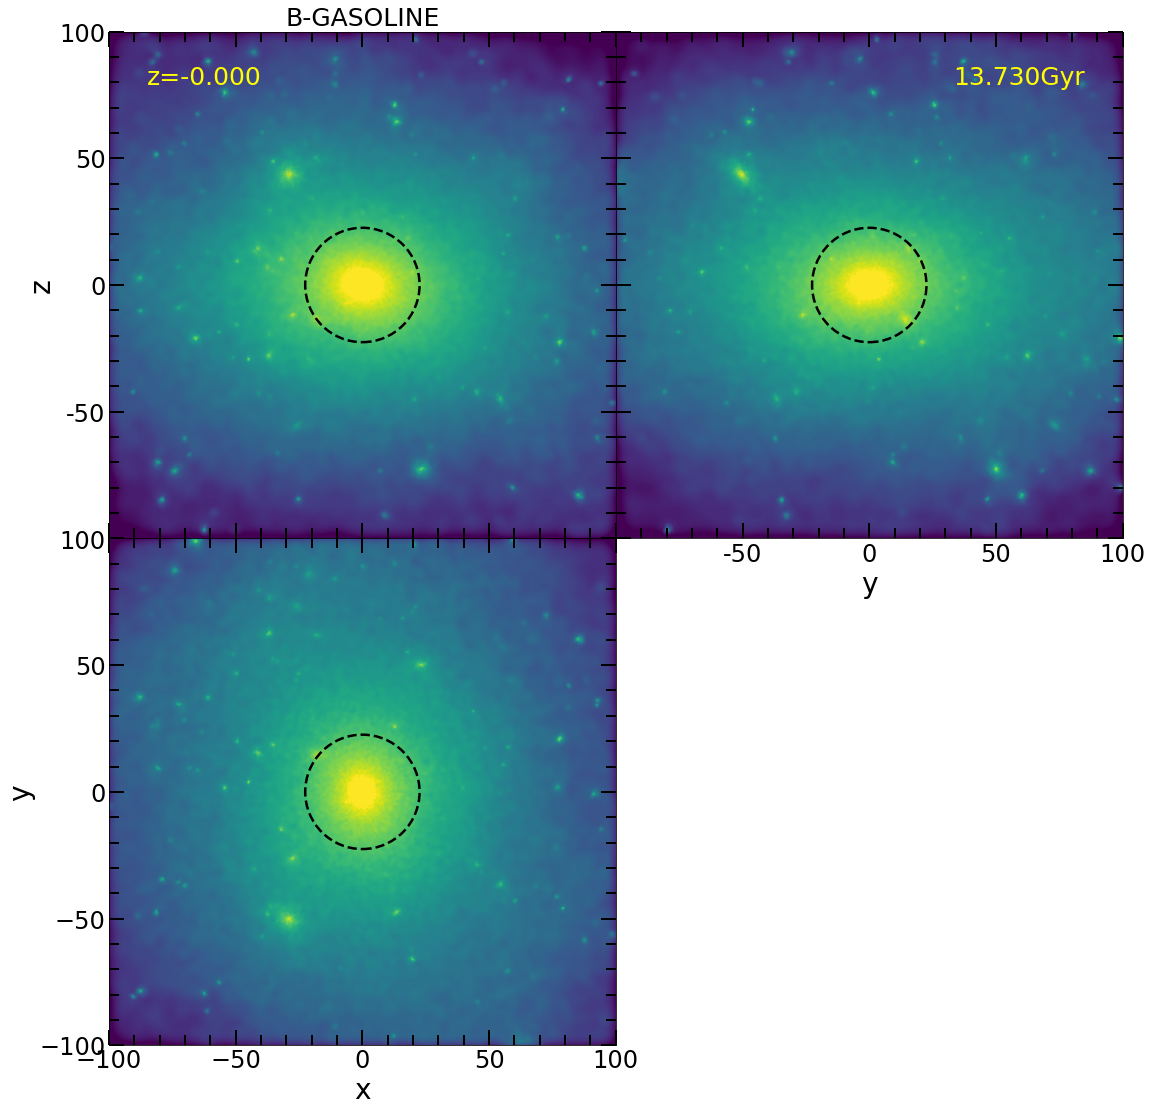

In [5]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import barstrength2 as strng
import time_conversion as tiempo
import sphviewer as sph
# from mpl_toolkits.axes_grid1 import make_axes_locatable

a0 = 1.
vector = (1,2,4)
vector2 = ('M31', 'MW')
vector3 = ('A','B')
# carpeta = ('9in1_M31/', '9in1_MW_new/')

#path = 'home/ornela/SimCLUES/'
path = '/mnt/sersic2/omarioni/'

snapshot = np.loadtxt(path + 'Gasoline/snapshots.txt', dtype='string')


for j in range(59,58,-1):
    snap = h5py.File(path + 'Gasoline/outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')

    print snapshot[j]

#     for i in range(1,2):
    i=1
    
    cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'][()]
    r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'][()]
    time = snap['subhalo_00'+ str('%s' %vector[i])+ '/Time'][()]
    h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'][()]
    aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'][()]

    pstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Coordinates'][()]
    mstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Masses'][()]
    vel  = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Velocities'][()]

    pdrk = snap['subhalo_00' + str('%s' %vector[i]) + '/Drk/Coordinates'][()]
    mdrk = snap['subhalo_00' + str('%s' %vector[i]) + '/Drk/Masses'][()]

    z = a0/aexp - 1.
    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = pstr[:,0]-cm[0]
    ystr = pstr[:,1]-cm[1]
    zstr = pstr[:,2]-cm[2]
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    xdrk = pdrk[:,0]-cm[0]
    ydrk = pdrk[:,1]-cm[1]
    zdrk = pdrk[:,2]-cm[2]
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    v_x = vel[:,0] 
    v_y = vel[:,1] 
    v_z = vel[:,2] 

    #----------------------masas----------------------------

    r200 = r200*aexp
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = np.cumsum((mstr[limit])[r_indice])
    M_gal = Mc_str[-1]

    #------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]
    r50 = r_sort[cincuenta][-1]             

    #--------------------------------------------         
    veloc,=np.where(r<r50)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    #----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp)

    ##posiciones de particulas que se quiere graficar
    ##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    xn_drk = e1x*xdrk + e1y*ydrk + e1z*zdrk
    yn_drk = e2x*xdrk + e2y*ydrk + e2z*zdrk
    zn_drk = e3x*xdrk + e3y*ydrk + e3z*zdrk


    pos=np.ndarray([np.size(xn),4])
    pos[:,0]=xn
    pos[:,1]=yn
    pos[:,2]=zn
    pos[:,3]=mstr

    pos2=np.ndarray([np.size(xn_drk),4])
    pos2[:,0]=xn_drk
    pos2[:,1]=yn_drk
    pos2[:,2]=zn_drk
    pos2[:,3]=mdrk

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

    fig.subplots_adjust(bottom=0.07, left =0.09, right = 0.97, top = 0.95, wspace=0.0, hspace= 0.0)

    #----------------------------------------------------------------------

    #---------------------generador del grafico3-----------------
    rl= 100   
    corte,=np.where((xn_drk <rl) & (yn_drk <rl) & (zn_drk <rl) & (xn_drk >-rl) & (yn_drk >-rl) & (zn_drk >-rl))


    #-----rango que tiene la escala  de colores-----
    vmin=4.5
    vmax=6.7

    # ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='viridis'

    #         nb1 = 300 
    nb1 = 25
    npixel = 1000

    particles=sph.Particles(pos2[corte,:3],mdrk[corte],nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()

    ax[1,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[1,0].set_xlim(-100,100)
    ax[1,0].set_ylim(-100,100)
    ax[1,0].set_xticks([-100,-50,0,50,100])
    ax[1,0].set_yticks([-100,-50,0,50,100])
    ax[1,0].set_xlabel('x',fontsize=28)
    ax[1,0].set_ylabel('y',fontsize=28)
    ax[1,0].minorticks_on()
    ax[1,0].tick_params( labelsize=24)
    ax[1,0].tick_params('both', length=10, width=2,which='minor', direction='in', right=True,top=True)
    ax[1,0].tick_params('both', length=15, width=2,which='major', direction='in', right=True,top=True)
    ax[1,0].add_patch(plt.Circle((0,0),radius=rgal,ec='k',fc=None,ls='--',lw=2.5, fill=False))
    #     ax[0,1].set_xticklabels([])
    #     ax[0,1].set_yticklabels([])
    #     ax[0,1].annotate("",xy=(-40, -40), xycoords='data',xytext=(-10, -40),textcoords='data',
    #                  ha='center', va='center', 
    #                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

    #     ax[2,0].text(-25, -40, '30kpc', fontsize=25, color='white', ha='center', va='bottom')


    #--------------------------------------
    particles=sph.Particles(pos2[corte,:3],mdrk[corte],nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()


    ax[0,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[0,0].set_xlim(-100,100)
    ax[0,0].set_ylim(-100,100)
    ax[0,0].set_xticks([-100,-50,0,50,100])
    ax[0,0].set_yticks([-50,0,50,100])
    ax[0,0].set_xticklabels([])
    ax[0,0].set_yticklabels([-50,0,50,100])
    ax[0,0].set_ylabel('z',fontsize=28)
    ax[0,0].minorticks_on()
    ax[0,0].tick_params( labelsize=24)
    ax[0,0].tick_params('both', length=10, width=2,which='minor', direction='in', right=True,top=True)
    ax[0,0].tick_params('both', length=15, width=2,which='major', direction='in', right=True,top=True)
    ax[0,0].text(-85, 82,'z='+str('%.3f'%z), fontsize=25, color='yellow', ha='left', va='center') 
    ax[0,0].add_patch(plt.Circle((0,0),radius=rgal,ec='k',fc=None,ls='--',lw=2.5, fill=False))
    ax[0,0].set_title('B-GASOLINE',fontsize=25,loc='center')
#     #--------------------------------------
    particles=sph.Particles(pos2[corte,:3],mdrk[corte],nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90,p=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()


    ax[0,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[0,1].set_xlim(-100,100)
    ax[0,1].set_ylim(-100,100)
    ax[0,1].set_xticks([-50,0,50,100])
    ax[0,1].set_yticks([-100,-50,0,50,100])
    ax[0,1].set_yticklabels([])
    ax[0,1].set_xticklabels([-50,0,50,100])
    ax[0,1].minorticks_on()
    ax[0,1].tick_params( labelsize=24)
    ax[0,1].tick_params('both', length=10, width=2,which='minor', direction='in', right=True,top=True)
    ax[0,1].tick_params('both', length=15, width=2,which='major', direction='in', right=True,top=True)
    ax[0,1].set_xlabel('y',fontsize=28)
    ax[0,1].text(85, 82, str('%.3f'%time)+'Gyr', fontsize=25, color='yellow', ha='right', va='center') 
    ax[0,1].add_patch(plt.Circle((0,0),radius=rgal,ec='k',fc=None,ls='--',lw=2.5, fill=False))


    ax[1,1].axis('off')
    
#     plt.show(False)
    
    path2 = '/home/omarioni/Barras_GdGs/Barras_Gs/_imagenes/test_STEFAN/'
    fig.savefig(path2 + str('%s' %vector2[i])+'_'+str('%s' %snapshot[j])+'.png',
                dpi = 100, xxbox_inches='tight')
#     plt.close()

    plt.show()